In [3]:
# # Install necessary packages
# !pip install --upgrade google-cloud-bigquery
# !pip install torch_geometric
# !pip install google-cloud-bigquery-storage==2.18.1
# !pip install --upgrade google-cloud-bigquery[pandas]

In [4]:
import importlib
from google.colab import drive

drive.mount('/content/drive')

# Add the lib folder to the Python path
import sys
sys.path.append('/content/drive/My Drive/Expt_GNNs_MIMIC-iii/')

# Import the functions from PatientDataFetcher.py
from SBSCGM import SepsisPatientDataFrame as main

Mounted at /content/drive
Executing optimized BigQuery fetch for sepsis patient data...
Error executing BigQuery fetch: 400 POST https://bigquery.googleapis.com/bigquery/v2/projects/your_project_id/jobs?prettyPrint=false: ProjectId must be non-empty

Location: None
Job ID: 047f574d-35df-492a-a6b1-7987e0f1cd2f

Empty DataFrame
Columns: []
Index: []


In [5]:
# Set parameters
project_id = 'forward-citron-385513'
dataset_name = 'physionet-data.mimiciii_demo'
# dataset_name = 'physionet-data.mimiciii_clinical'

fetcher = main.SepsisPatientBigQueryFetcher(project_id, dataset_name)
df = fetcher.fetch_sepsis_data()

Executing optimized BigQuery fetch for sepsis patient data...
Fetched 35146759 records from the BigQuery execution.


In [ ]:
df.head()

,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,HADM_ID,ADMISSION_LOCATION,ADMISSION_TYPE,...,NDC,PROD_STRENGTH,FORM_UNIT_DISP,FORM_VAL_DISP,ITEMID,VALUE,VALUENUM,VALUEUOM,CHARTTIME,FLAG
0,41976,M,2136-07-28,2202-12-05,NaT,2202-12-05,1,176016,EMERGENCY ROOM ADMIT,EMERGENCY,...,338001702,250mL Bag,mL,250,50983,149,149.0,mEq/L,2199-02-04 12:34:00,abnormal
1,41976,M,2136-07-28,2202-12-05,NaT,2202-12-05,1,176016,EMERGENCY ROOM ADMIT,EMERGENCY,...,338001702,250mL Bag,mL,250,50868,9,9.0,mEq/L,2199-02-06 03:10:00,None
2,41976,M,2136-07-28,2202-12-05,NaT,2202-12-05,1,176016,EMERGENCY ROOM ADMIT,EMERGENCY,...,338001702,250mL Bag,mL,250,50882,26,26.0,mEq/L,2199-02-03 09:35:00,None
3,41976,M,2136-07-28,2202-12-05,NaT,2202-12-05,1,176016,EMERGENCY ROOM ADMIT,EMERGENCY,...,338001702,250mL Bag,mL,250,50960,1.3,1.3,mg/dL,2199-02-01 15:00:00,abnormal
4,41976,M,2136-07-28,2202-12-05,NaT,2202-12-05,1,176016,EMERGENCY ROOM ADMIT,EMERGENCY,...,338001702,250mL Bag,mL,250,50960,1.6,1.6,mg/dL,2199-02-02 14:13:00,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35146759 entries, 0 to 35146758
Data columns (total 54 columns):
 #   Column                Dtype         
---  ------                -----         
 0   SUBJECT_ID            Int64         
 1   GENDER                object        
 2   DOB                   datetime64[us]
 3   DOD                   datetime64[us]
 4   DOD_HOSP              datetime64[us]
 5   DOD_SSN               datetime64[us]
 6   EXPIRE_FLAG           Int64         
 7   HADM_ID               Int64         
 8   ADMISSION_LOCATION    object        
 9   ADMISSION_TYPE        object        
 10  ADMITTIME             datetime64[us]
 11  DEATHTIME             datetime64[us]
 12  HOSPITAL_EXPIRE_FLAG  Int64         
 13  RELIGION              object        
 14  DISCHARGE_LOCATION    object        
 15  DISCHTIME             datetime64[us]
 16  EDOUTTIME             datetime64[us]
 17  EDREGTIME             datetime64[us]
 18  ETHNICITY             object        
 19

In [ ]:
df.describe()

,SUBJECT_ID,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,HADM_ID,ADMITTIME,DEATHTIME,HOSPITAL_EXPIRE_FLAG,...,SEQ_NUM,ICD9_CODE_1,SEQ_NUM_1,STARTDATE,ENDDATE,GSN,NDC,ITEMID,VALUENUM,CHARTTIME
count,35146759.0,35146759,35146759,2243764,35146759,35146759.0,35146759.0,35146759,251326,35146759.0,...,35146759.0,35146759.0,35146759.0,35146759,35146759,31753834.0,35146759.0,35146759.0,3.246604e+07,35146759
mean,35375.622219,2116-11-27 20:09:11.585613,2186-09-20 00:13:53.162085,2166-04-08 04:51:17.431671,2186-09-20 00:13:53.162085,1.0,168289.757216,2184-05-21 16:11:41.919000,2171-06-18 03:16:17.773727,0.007151,...,10.077696,4404.498283,3.880889,2184-05-24 09:20:36.446061,2184-05-27 00:45:34.346320,15128.699303,12362016568.371073,51037.428307,4.805864e+01,2184-05-24 17:30:58.313946
min,10006.0,1880-02-29 00:00:00,2107-07-20 00:00:00,2125-10-07 00:00:00,2107-07-20 00:00:00,1.0,100375.0,2107-01-04 11:59:00,2125-10-07 15:13:00,0.0,...,1.0,14.0,1.0,2107-01-05 00:00:00,2107-01-05 00:00:00,175.0,0.0,50800.0,-2.900000e+01,2107-01-04 22:38:00
25%,41976.0,2136-07-28 00:00:00,2202-12-05 00:00:00,2165-08-12 00:00:00,2202-12-05 00:00:00,1.0,153826.0,2199-01-31 22:26:00,2180-03-20 18:00:00,0.0,...,5.0,3891.0,2.0,2199-02-01 00:00:00,2199-02-01 00:00:00,1285.0,88222033.0,50868.0,4.000000e+00,2199-01-31 18:46:00
50%,41976.0,2136-07-28 00:00:00,2202-12-05 00:00:00,2165-08-12 00:00:00,2202-12-05 00:00:00,1.0,176016.0,2199-01-31 22:26:00,2180-03-20 18:00:00,0.0,...,9.0,3932.0,3.0,2199-02-02 00:00:00,2199-02-07 00:00:00,6342.0,338051902.0,50970.0,1.640000e+01,2199-02-03 09:35:00
75%,41976.0,2136-07-28 00:00:00,2202-12-05 00:00:00,2165-08-12 00:00:00,2202-12-05 00:00:00,1.0,176016.0,2199-01-31 22:26:00,2185-03-26 09:15:00,0.0,...,14.0,5412.0,6.0,2199-02-12 00:00:00,2199-02-14 00:00:00,21414.0,8290036005.0,51249.0,4.500000e+01,2199-02-10 04:14:00
max,41976.0,2136-07-28 00:00:00,2202-12-05 00:00:00,2185-03-26 00:00:00,2202-12-05 00:00:00,1.0,189483.0,2202-10-03 01:45:00,2185-03-26 09:15:00,1.0,...,37.0,9915.0,9.0,2202-10-11 00:00:00,2202-10-11 00:00:00,68196.0,68084007001.0,51523.0,9.362000e+03,2202-10-11 04:45:00
std,12894.346092,NaN,NaN,NaN,NaN,0.0,12514.878309,NaN,NaN,0.084259,...,7.064869,2762.377164,2.479522,NaN,NaN,18881.871489,23229208421.356422,199.013436,1.033055e+02,NaN


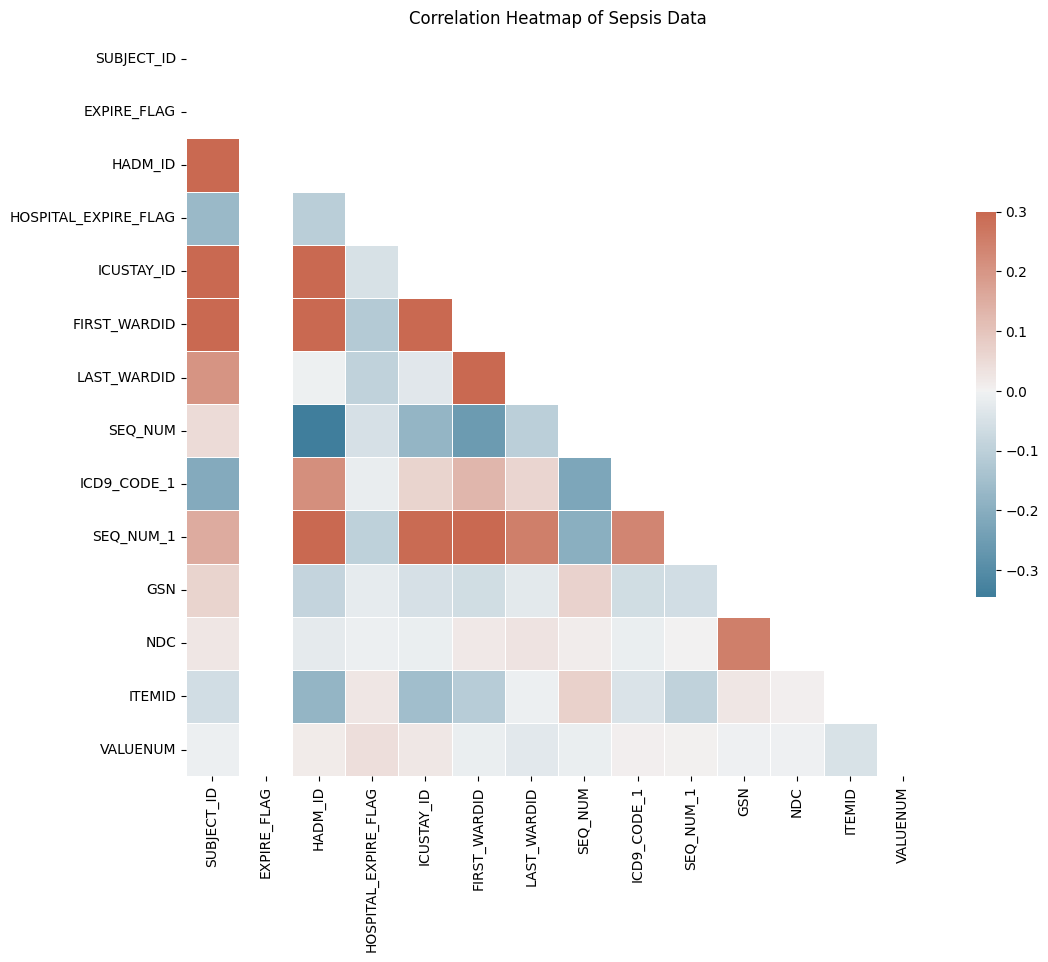

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Sepsis Data')
plt.show()

In [ ]:
df.EXPIRE_FLAG.value_counts(), df.EXPIRE_FLAG.value_counts(normalize=True) # Demo dataset

(EXPIRE_FLAG
 1    35146759
 Name: count, dtype: Int64,
 EXPIRE_FLAG
 1    1.0
 Name: proportion, dtype: Float64)

In [7]:
def transform_data(df):
  # Import LabelEncoder and StandardScaler
  from sklearn.preprocessing import LabelEncoder, StandardScaler

  # Convert categorical features to numerical
  categorical_cols = df.select_dtypes(include=['object']).columns
  for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

  # Fill missing values
  df.fillna(0, inplace=True)

  # Scale numerical values
  numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
  df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

  print("Data transformation completed.")
  return df

df = transform_data(df)
df.head()

<ipython-input-7-46638eb7d116>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[us], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


Data transformation completed.


,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,HADM_ID,ADMISSION_LOCATION,ADMISSION_TYPE,...,NDC,PROD_STRENGTH,FORM_UNIT_DISP,FORM_VAL_DISP,ITEMID,VALUE,VALUENUM,VALUEUOM,CHARTTIME,FLAG
0,0.511882,0.297702,2136-07-28,2202-12-05,0,2202-12-05,0.0,0.617365,0.493235,0.0,...,-0.517625,0.010546,0.8873,0.941551,-0.273491,-0.760978,1.074954,0.216413,2199-02-01 15:00:00,1.006478
1,0.511882,0.297702,2136-07-28,2202-12-05,0,2202-12-05,0.0,0.617365,0.493235,0.0,...,-0.517625,0.010546,0.8873,0.941551,-1.072432,-0.883676,0.945088,0.216413,2199-02-01 07:18:00,-0.961504
2,0.511882,0.297702,2136-07-28,2202-12-05,0,2202-12-05,0.0,0.617365,0.493235,0.0,...,-0.517625,0.010546,0.8873,0.941551,-0.780994,-0.555377,-0.253668,0.216413,2199-02-01 02:20:00,1.006478
3,0.511882,0.297702,2136-07-28,2202-12-05,0,2202-12-05,0.0,0.617365,0.493235,0.0,...,-0.517625,0.010546,0.8873,0.941551,2.143432,1.643228,-0.443471,0.519172,2199-01-31 18:46:00,-0.961504
4,0.511882,0.297702,2136-07-28,2202-12-05,0,2202-12-05,0.0,0.617365,0.493235,0.0,...,-0.517625,0.010546,0.8873,0.941551,0.887235,1.006527,0.075990,0.519172,2199-02-01 14:00:00,1.006478


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35146759 entries, 0 to 35146758
Data columns (total 54 columns):
 #   Column                Dtype         
---  ------                -----         
 0   SUBJECT_ID            float64       
 1   GENDER                float64       
 2   DOB                   datetime64[us]
 3   DOD                   datetime64[us]
 4   DOD_HOSP              object        
 5   DOD_SSN               datetime64[us]
 6   EXPIRE_FLAG           float64       
 7   HADM_ID               float64       
 8   ADMISSION_LOCATION    float64       
 9   ADMISSION_TYPE        float64       
 10  ADMITTIME             datetime64[us]
 11  DEATHTIME             object        
 12  HOSPITAL_EXPIRE_FLAG  float64       
 13  RELIGION              float64       
 14  DISCHARGE_LOCATION    float64       
 15  DISCHTIME             datetime64[us]
 16  EDOUTTIME             object        
 17  EDREGTIME             object        
 18  ETHNICITY             float64       
 19

In [ ]:
import pandas as pd
import base64

def base64_encode_df(df):
    """Encodes each column of a DataFrame to base64."""
    encoded_df = pd.DataFrame()
    for column in df.columns:
        encoded_df[column] = df[column].apply(lambda x: base64.b64encode(str(x).encode()).decode() if pd.notna(x) else None)
    return encoded_df

df_encoded = base64_encode_df(df)
# df_encoded.head()
# df_encoded.info()